# Algoritmo kNN

<br> p = parâmetro da distância de Minkowski
<br> feat = par de features a se considerar dos dados de entrada

In [3]:
import pylab as pl
import numpy as np

def knn(k,p,data,feat,testpoint):
    # calculo da distancia de Minkowski para todos os pontos em relacao ao ponto de test
    distances = ((data[:,feat[0]]-testpoint[0])**p + (data[:,feat[1]]-testpoint[1])**p)**(1/p)
    # ordena da menor distancia encontrada para a maior e retorna os indices dos pontos relativos
    indices = np.argsort(distances,axis=0)
    # retorna os k pontos mais proximos
    vizinhos = data[indices[:k],:4]
    classes = data[indices[:k],4]
    # conjunto de artificios para descobrir qual a classe mais frequente dentre esses k pontos (voto)
    unique,pos=np.unique(classes,return_inverse=True)
    counts=np.bincount(pos)
    maxpos=np.argmax(counts)
    return (vizinhos,classes,unique[maxpos])

# Visualizando a base e aplicando o kNN

Ponto de teste: [7 6]
Output do knn: 
(array([[5, 7, 6, 8],
       [5, 7, 6, 11],
       [6, 7, 6, 4]], dtype=object), array(['A', 'B', 'A'], dtype=object), 'A')


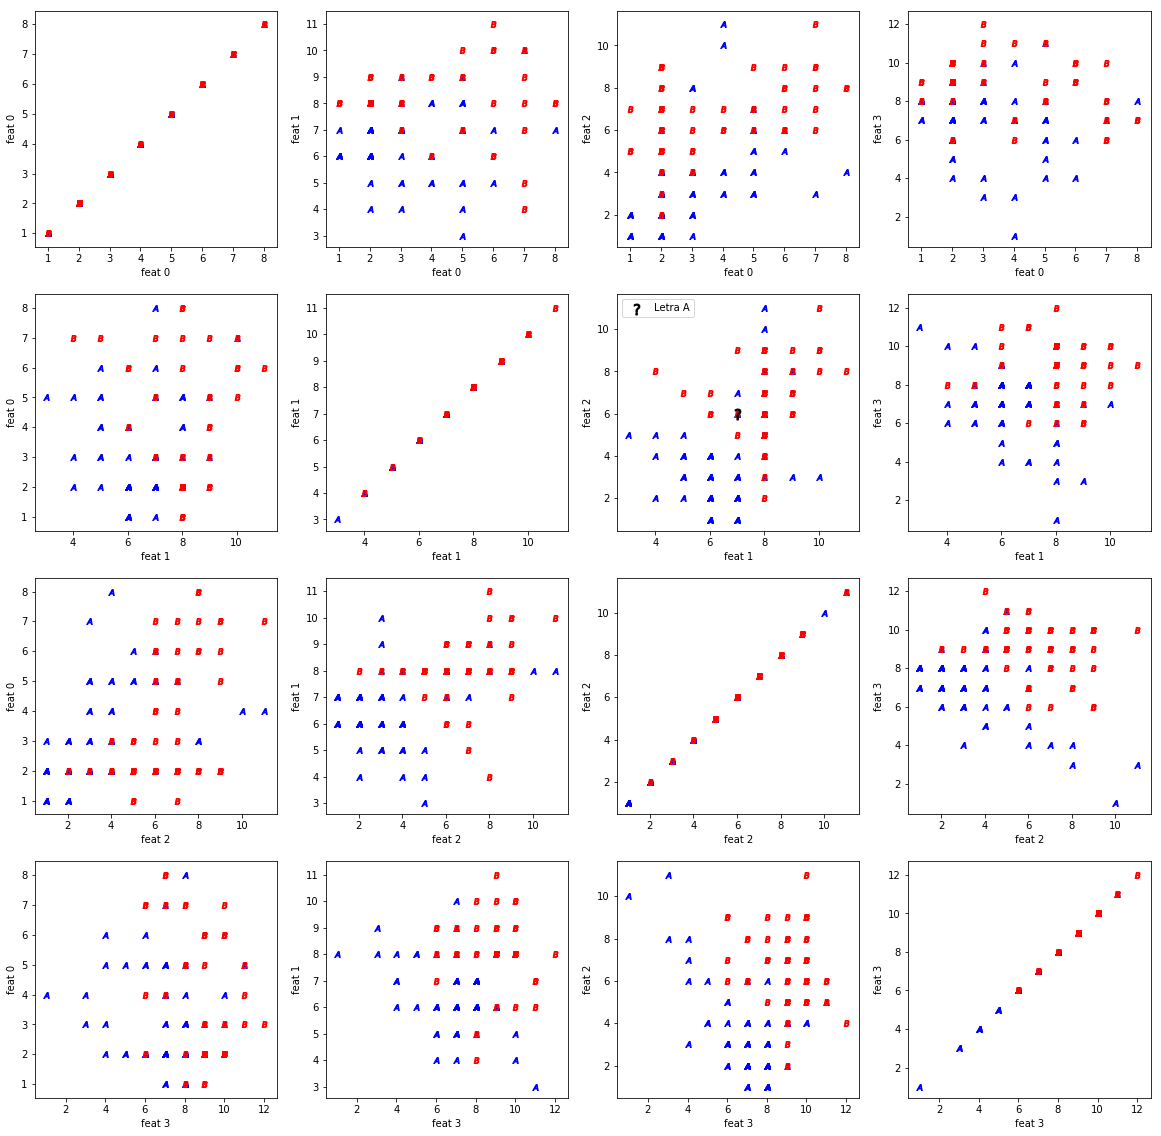

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

########################################################
## LEITURA DO DATATSET DE LETRAS A SEREM RECONHECIDAS ##
########################################################
# Link que descreve do que se trata a base: https://archive.ics.uci.edu/ml/datasets/letter+recognition
df = pd.read_csv('letter.data', header=None)

#########################################################
## SELECAO DAS FEATURES E NUM EXEMPLOS A SE CONSIDERAR ##
#########################################################
# Especifique o numero desejado de exemplos da base
n = 2000
# A classe usualmente é a última coluna
classe = df.shape[1]-1
# Lista de features
features = [12,13,14,15,classe]
nfeatures = len(features)-1
# Selecionar n primeiros exemplos com rotulos iguais à letra A ou B
# Coniderar apenas caracteristicas especificadas no array features
data = df.iloc[0:n, features].values
condition = np.equal(data[:,4],'A') | np.equal(data[:,4],'B')
data = data[np.where(condition)]
X = data[:,:nfeatures]
y = data[:,nfeatures]
y = np.where(y == 'A', 1, -1)

###############################################################
## GERACAO DE SCATTER PLOT DOS PARES DE FEATURES UTILIZADAS ##
###############################################################
ax = plt.subplots(4,4,figsize=(20,20))
ypos = np.where(y == 1)
yneg = np.where(y == -1)
# Laço exibe Scatter Plot (todos vs. todos)
subplotindice = 1
for i in range(0,4):
    for j in range(0,4):
        ax = plt.subplot(4,4,subplotindice)
        ax.scatter(X[ypos, i], X[ypos, j],color='blue', marker='$A$')#, label='Letra A')
        ax.scatter(X[yneg, i], X[yneg, j],color='red', marker='$B$')#, label='Letra B')
        plt.xlabel('feat '+str(i))
        plt.ylabel('feat '+str(j))
        subplotindice += 1

###############################
## EXECUCAO DO ALGORITMO KNN ##
###############################
# Gera aleatoriamente um exemplo para teste
teste = np.random.randint(1,13,size=2)
print('Ponto de teste: '+str(teste))
# Executa kNN para exemplo de teste
# O parâmetro (0,1) especifica que irá se utilizar as feature 0 e 1 apenas
feature1 = 1
feature2 = 2
output = knn(3,2,data,(feature1,feature2),teste)
print('Output do knn: ')
print(output)

####################################################
## EXIBICAO DO PONTO DE TESTE NO SUBPLOT DESEJADO ##
####################################################
# Usa o subplot relativo ao par de features selecionado para o knn para exibir o ponto de teste e sua respectiva classe
# Ex: se as features escolhidas forem a 1 e a 2, o ponto de teste ? será exibido no setimo subplot gerado
posarray = np.arange(1,17).reshape((4, 4))
ax = plt.subplot(4,4,posarray[feature1][feature2])
ax.scatter(teste[0], teste[1],s=120,color='black', marker='$?$', label='Letra '+str(output[2]))
plt.legend(loc='upper left')

pl.show()